#### Just a very quick exploratory data analysis to see what is inside the data
#### Due to time constraints EDA was not pushed very far

In [1]:
## coding=utf-8
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from skimage.transform import resize

pd.set_option('display.width', 3000)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 210)

#### Import dataset

In [3]:
df = pd.read_parquet('../data/1-preprocessed/features.parquet')

df.head()

,bookingID,bookingID2,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed,second
0,0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,3.442991,0.0
1,0,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,0.228454,1.0
2,0,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,0.228454,2.0
3,0,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,0.228454,3.0
4,0,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,0.228454,4.0


In [4]:
features = ['Accuracy', 'Bearing', 
            'acceleration_x', 'acceleration_y', 'acceleration_z', 
            'gyro_x', 'gyro_y', 'gyro_z', 'Speed',]

In [5]:
# Standardize df
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
df[features] = scaler.fit_transform(df[features])
df.head()

,bookingID,bookingID2,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed,second
0,0,0,-0.065808,-0.203014,0.519251,-1.799007,-0.905112,-0.097848,-0.272418,0.445517,-0.654882,0.0
1,0,0,-0.094146,-0.203014,0.331579,-1.785868,-0.912408,-0.303750,-0.228581,0.272730,-1.050530,1.0
2,0,0,-0.094146,-0.203014,-1.224332,-1.715775,-0.659474,-0.182755,-0.094979,0.098366,-1.050530,2.0
3,0,0,-0.094146,-0.203014,-1.024369,-1.750181,-0.858146,-0.139022,0.013993,-0.159713,-1.050530,3.0
4,0,0,-0.094146,-0.203014,-0.458978,-1.788095,-0.711045,-0.084845,-0.134154,0.139211,-1.050530,4.0


#### Check how many observations we have per booking ID

In [6]:
stats = df.groupby(['bookingID'] ,as_index=False).agg({'second':'count'})
stats['second'].describe(percentiles=[.9,.95,.99])

count    20000.000000
mean       848.522350
std        454.169604
min        120.000000
50%        780.000000
90%       1456.000000
95%       1621.000000
99%       2083.010000
max       8236.000000
Name: second, dtype: float64

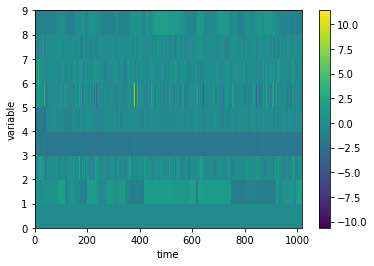

In [7]:
# let's have a look at one trip
trip = random.choice(list(df.bookingID.unique()))
sample = df.loc[df.bookingID==trip]

# plot a matrix of observation values
plt.pcolor(sample[features].T.values)
plt.ylabel("variable")
plt.xlabel("time")
plt.ylim(0,9)
plt.colorbar()
plt.show()

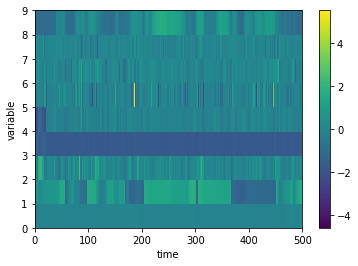

In [8]:
resized_sample = resize(sample[features].T.values, (9,500), mode='constant')
# plot a matrix of observation values
plt.pcolor(resized_sample)
plt.ylabel("variable")
plt.xlabel("time")
plt.ylim(0,9)
plt.colorbar()
plt.show()

#### Check the distribution of the target variable

In [11]:
dt = pd.read_csv('../data/0-raw_data/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')
dt = dt.groupby(['bookingID'], as_index=False)['label'].max()
dt.label.describe()

count    20000.000000
mean         0.250050
std          0.433052
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64